<a href="https://colab.research.google.com/github/DiploDatos/AnalisisYCuracion/blob/master/01_Exploracion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2021*

----

# Exploración de datos

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [84]:
import matplotlib.pyplot as plt
import numpy
import pandas
import datetime as dt

import seaborn
seaborn.set_context('talk')

In [3]:
melb_df = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv',
    #date_parser=["Date"]
)
melb_df[:3]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


## Representación de los ejemplos

La tarea sobre la que nos centraremos es **estimar el precio de cada propiedad**, sabiendo el resto de sus características.

El primer paso de todo análisis es realizar una exploración de los datos y analizar las distribuciones de sus variables. Es decir, aplicar las herramientas que hemos estudiado durante la materia anterior, [Análisis y Visualización de Datos](https://diplodatos.famaf.unc.edu.ar/analisis-y-visualizacion-de-datos/). Por este motivo, no entraremos en detalles en esta notebook, sino que será parte de la ejercitación práctica.

<AxesSubplot:xlabel='Price', ylabel='Count'>

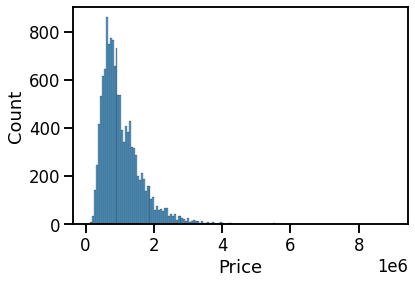

In [4]:
seaborn.histplot(melb_df.Price.dropna())

In [5]:
melb_df.query("YearBuilt > 1980")

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
11,Abbotsford,40 Nicholson St,3,h,1350000.0,VB,Nelson,12/11/2016,2.5,3067.0,...,2.0,2.0,214.0,190.0,2005.0,Yarra,-37.80850,144.99640,Northern Metropolitan,4019.0
12,Abbotsford,123/56 Nicholson St,2,u,750000.0,S,Biggin,12/11/2016,2.5,3067.0,...,2.0,1.0,0.0,94.0,2009.0,Yarra,-37.80780,144.99650,Northern Metropolitan,4019.0
19,Abbotsford,42 Valiant St,2,h,890000.0,S,Biggin,17/09/2016,2.5,3067.0,...,1.0,1.0,150.0,73.0,1985.0,Yarra,-37.80110,145.00040,Northern Metropolitan,4019.0
21,Abbotsford,13/11 Nicholson St,3,t,900000.0,S,Beller,18/03/2017,2.5,3067.0,...,2.0,2.0,0.0,NaN,2010.0,Yarra,-37.80930,144.99590,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13568,Wantirna,16 chesterfield Ct,4,h,951000.0,S,Ray,26/08/2017,14.7,3152.0,...,2.0,2.0,704.0,200.0,1981.0,NaN,-37.85639,145.23536,Eastern Metropolitan,5424.0
13572,Watsonia,76 Kenmare St,2,h,650000.0,PI,Morrison,26/08/2017,14.5,3087.0,...,1.0,1.0,210.0,79.0,2006.0,NaN,-37.70657,145.07878,Northern Metropolitan,2329.0
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0


Luego de que tenemos una idea aproximada de la forma y el significado de cada una de las variables en nuestro conjunto de datos, tenemos que comenzar a pensar qué tan útiles son para mi tarea de predicción en particular.

## Fechas

Las fechas representan la variable *tiempo*, que no es trivial de representar en mi conjunto de datos. 

* ¿Cómo afecta el tiempo al fenómeno que quiero estudiar?
* ¿Es importante de manera absoluta o de manera relativa?
* ¿Con qué nivel de precisión (o con qué escala) es relevante? ¿Años, días, minutos? ¿Importa la zona horaria?

Además de estas preguntas conceptuales, tenemos que tener en cuenta con qué tipo de datos (de Python) están representadas estas fechas:

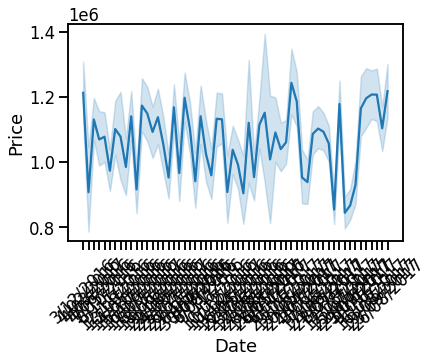

In [6]:
seaborn.lineplot(data=melb_df, x='Date', y='Price')
plt.xticks(rotation=45);

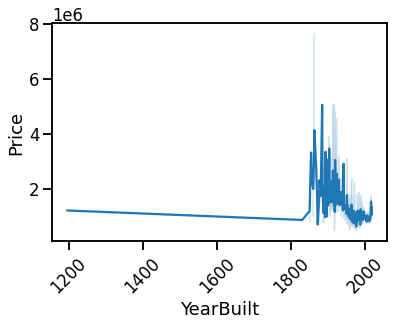

In [7]:
seaborn.lineplot(data=melb_df, x='YearBuilt', y='Price')
plt.xticks(rotation=45);

Al leer el dataset, las fechas fueron reconocidas como strings. Podemos cambiar el tipo de datos a `datetime`, que es una estructura de datos diseñada para trabajar con fechas hasta una precisión de milisegundos.

In [8]:
melb_df.Date.iloc[0]

'3/12/2016'

In [9]:
melb_df['date'] = pandas.to_datetime(melb_df.Date)

In [10]:
melb_df.date.iloc[0]

Timestamp('2016-03-12 00:00:00')

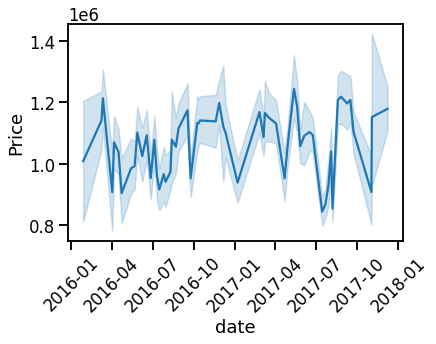

In [11]:
seaborn.lineplot(data=melb_df, x='date', y='Price')
plt.xticks(rotation=45);

Podemos considerar que el día no es importante para este conjunto de datos, y que sólo está aportando ruido.

Para extraer sólo el mes de una fecha, aplicamos una función a cada fila.

In [12]:
melb_df['date_month'] = pandas.to_datetime(melb_df.date.dt.strftime('%Y-%m'))

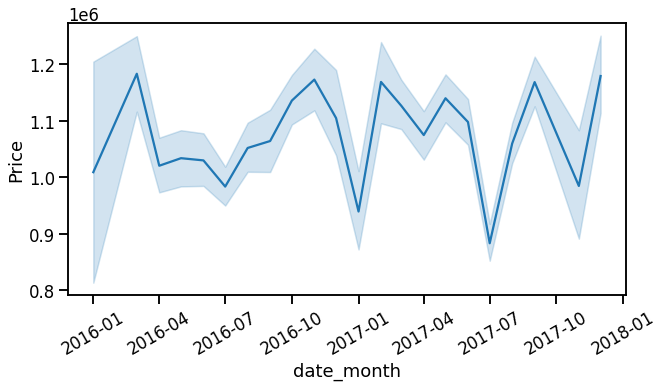

In [13]:
fig = plt.figure(figsize=(10, 5))
seaborn.lineplot(data=melb_df.sort_values('date_month'), x='date_month', y='Price')
plt.xticks(rotation=30);

## Ejercicio

En lugar de utilizar una precisión de meses, utilizar cuatrimestres para representar la fecha. Realizar una visualización del cambio de precios con respecto al año y al cuatrimestre.

* Construir una nueva columna con la antigüedad de la propiedad. Ver la distribución, y decicidir si la particionan.

Nota: investigue si existe una función en pandas para esto.

In [81]:
melb_df.fecha = pandas.to_datetime(melb_df['date'],format='%Y%m%d')
melb_df.month = pandas.DatetimeIndex(melb_df['fecha']).month
melb_df.year = pandas.DatetimeIndex(melb_df['fecha']).year
melb_df.cuatrimestre = melb_df.month.replace({1:'1',2:'1',3:'1',4:'1',5:'2',6:'2',7:'2',8:'2',9:'3',10:'3',11:'3',12:'3'})

melb_df[['year','month','cuatrimestre','Price']]

,year,month,cuatrimestre,Price
0,2016,3,1,1480000.0
1,2016,4,1,1035000.0
2,2017,4,1,1465000.0
3,2017,4,1,850000.0
4,2016,4,1,1600000.0
...,...,...,...,...
13575,2017,8,2,1245000.0
13576,2017,8,2,1031000.0
13577,2017,8,2,1170000.0
13578,2017,8,2,2500000.0


In [82]:
melb_df['cuatrimestre'] = melb_df.apply(lambda x:'%s-%s' % (x['year'],x['cuatrimestre']),axis=1)
melb_df.cuatrimestre

0        2016-1
1        2016-1
2        2017-1
3        2017-1
4        2016-1
          ...  
13575    2017-2
13576    2017-2
13577    2017-2
13578    2017-2
13579    2017-2
Name: cuatrimestre, Length: 13580, dtype: object

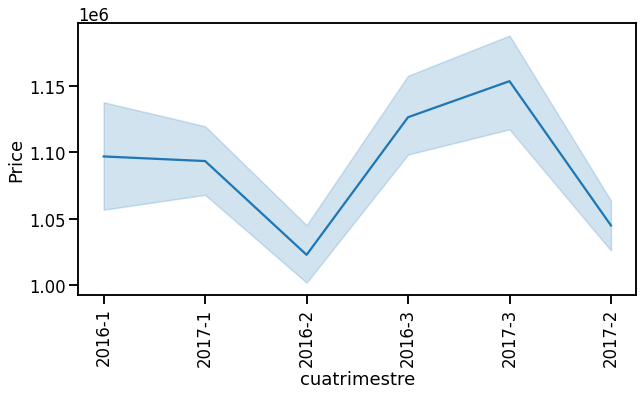

In [83]:
fig = plt.figure(figsize=(10, 5))
seaborn.lineplot(data=melb_df[['cuatrimestre','Price']], x='cuatrimestre', y='Price')
plt.xticks(rotation=90);

Construir una nueva columna con la antigüedad de la propiedad. Ver la distribución, y decicidir si la particionan.

In [89]:
year_current = pandas.Timestamp("today").strftime("%Y")
year_current

'2021'

In [98]:
melb_df['antiguedad'] = pandas.to_numeric(year_current) - melb_df.year
melb_df[['antiguedad','Price']]

,antiguedad,Price
0,5,1480000.0
1,5,1035000.0
2,4,1465000.0
3,4,850000.0
4,5,1600000.0
...,...,...
13575,4,1245000.0
13576,4,1031000.0
13577,4,1170000.0
13578,4,2500000.0


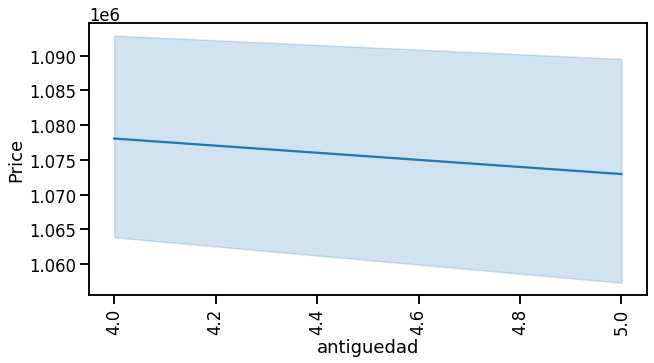

In [99]:
fig = plt.figure(figsize=(10, 5))
seaborn.lineplot(data=melb_df[['antiguedad','Price']], x='antiguedad', y='Price')
plt.xticks(rotation=90);

In [108]:
antiguedad_count = melb_df.antiguedad.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'antiguedad', 'year': 'frequency'})
antiguedad_count

,antiguedad,frequency
0,4,7244
1,5,6336
